In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from skipper import observe

import sys
sys.path.append('../scripts/')
import our_pointings
import sigjson_s2023a

In [5]:
#oiii_nights = obsdates[obsfilters == 'N540', :-1]
#halpha_nights = obsdates[obsfilters=='N708',:-1]

#tele_fname = '/Users/kadofong/Downloads/tele20221004.csv'
copilot_fname = '/Users/kadofong/Downloads/db_merian.fits'

coo_o = observe.CopilotOutput ( copilot_fname, oiii_pointings )
coo_h = observe.CopilotOutput ( copilot_fname, halpha_pointings )

In [91]:
from ekfplot import plot as ek
from ekfplot import colors as ec

In [28]:
plt.rcParams['font.size'] = 16

In [37]:
coo_o.sidecar['band'].unique()

array(['z', '', 'Y', 'g', 'r', 'VR', 'i', 'u', 'solid', 'N964', 'N673',
       'N501', 'N708', 'N419', 'N540'], dtype=object)

In [92]:
clist = [ec.ColorBase('#347deb'), ec.ColorBase('#d1a515'), ec.ColorBase('#15d131'), ec.ColorBase('#d11528')]

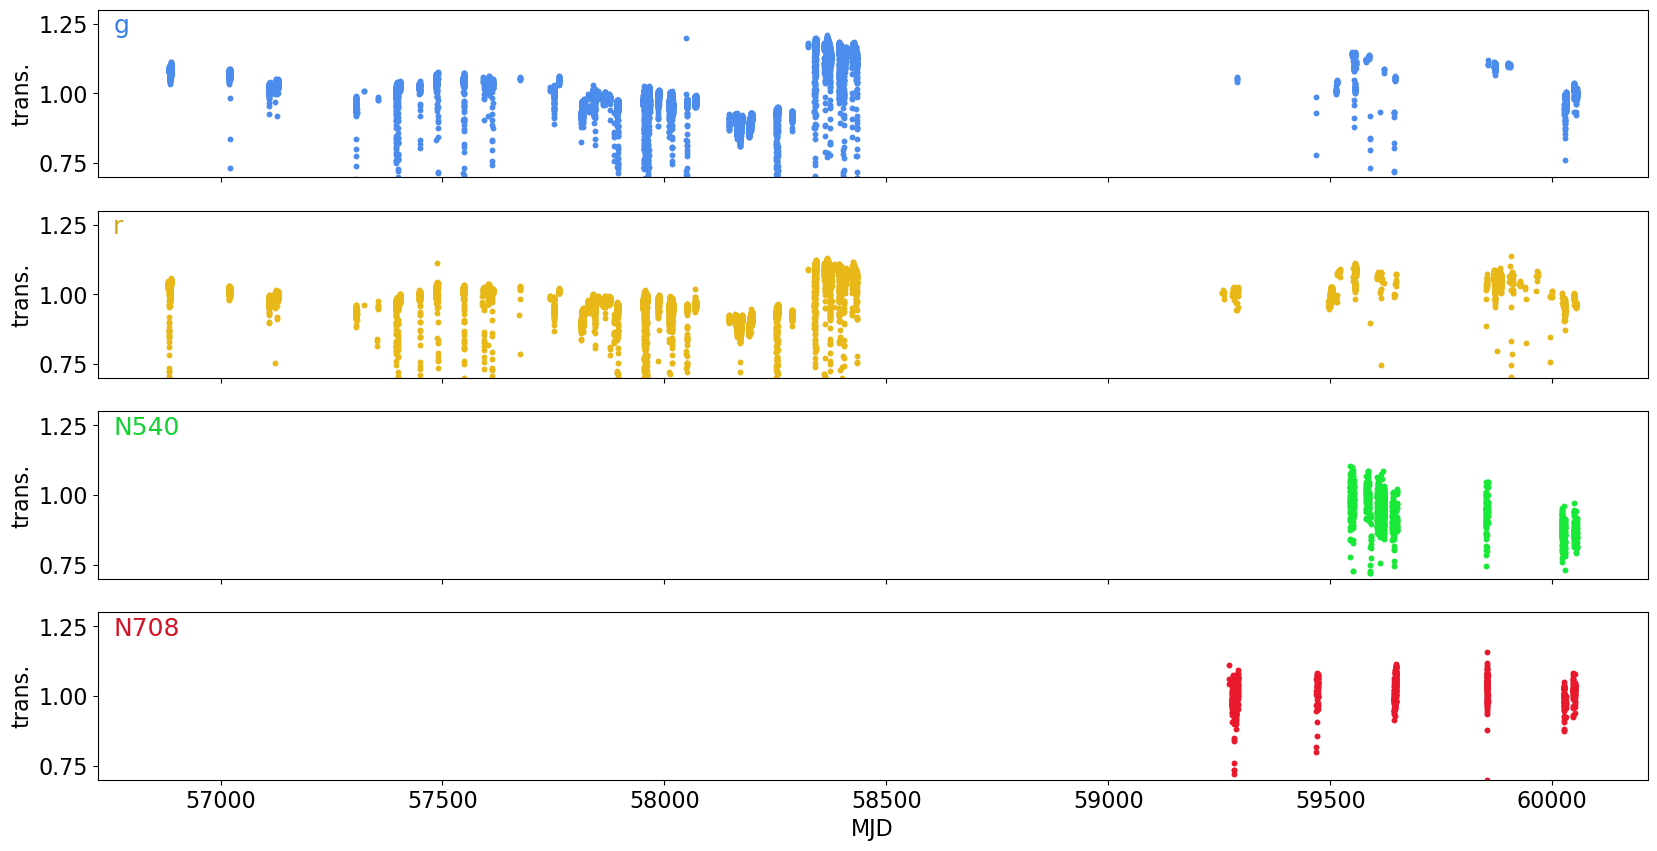

In [102]:
fig, axarr = plt.subplots(4,1,figsize=(20,10), sharex=True)
gmask = coo_o.sidecar['band'] == 'g'



for idx, band in enumerate(['g','r','N540','N708']):
    for coo in [coo_o,coo_h]:
        gmask = coo.sidecar['band'] == band
        axarr[idx].scatter ( coo.sidecar.loc[gmask,'mjd_obs'], 
                           coo.sidecar.loc[gmask,'transparency'],
                            color=clist[idx].modulate(0.05).base
                            )
    ek.text ( 0.01, 0.975, band, fontsize=18, color=clist[idx].base, ax=axarr[idx])
xlims = axarr[0].get_xlim()
for ax in axarr:
    ax.set_ylim(0.7,1.3)
    ax.set_xlim(xlims)
    ax.set_ylabel('trans.')
axarr[-1].set_xlabel('MJD')

#plt.xlim(56000, 61000)
#plt.xlim(coo_h.merian_sidecar['mjd_obs'].min(),coo_h.merian_sidecar['mjd_obs'].max())
plt.savefig('/Users/kadofong/Downloads/transparency_vs_time_ZOOMOUT.png')

In [77]:
xmin = min(coo_h.merian_sidecar['mjd_obs'].min(),coo_o.merian_sidecar['mjd_obs'].min())
xmax = max(coo_h.merian_sidecar['mjd_obs'].max(),coo_o.merian_sidecar['mjd_obs'].max()) + 10

In [105]:
coo_h.flag_for_reobservation ()

array(['GAMA_J104323.40+020344.60_N708', 'GAMA_J105359.75+003130.70_N708'],
      dtype=object)

In [106]:
coo_o.flag_for_reobservation (300.)

array([], dtype=object)

In [131]:
halpha_pointings, oiii_pointings =  our_pointings.load_springfields()
coo_d['sN540'] = observe.CopilotOutput ( copilot_fname, oiii_pointings )
coo_d['sN708'] = observe.CopilotOutput ( copilot_fname, halpha_pointings )

halpha_pointings, oiii_pointings =  our_pointings.load_fallfields()
coo_d['fN540'] = observe.CopilotOutput ( copilot_fname, oiii_pointings )
coo_d['fN708'] = observe.CopilotOutput ( copilot_fname, halpha_pointings )

In [136]:
from matplotlib import patches

In [ ]:
def wrap ( ra ):
    return np.where(ra>300., ra-360., ra)

In [ ]:
observe.

In [164]:
fov_radius = (3.18/np.pi)**0.5
fov_area = 3.18

40

In [178]:
for ofilter in  ['N540', 'N708']:
    rough_coverage = 0.
    for season in ['fall','spring']:
        halpha_pointings, oiii_pointings =  getattr(our_pointings, f'load_{season}fields')()
        pointings_d = {'N540':oiii_pointings,'N708':halpha_pointings}  
        

        completed = coo_d[f'{season[0]}{ofilter}'].identify_completed_pointings ( teff_min )
        in_cosmos = completed['object'].apply ( lambda x: 'COSMOS' in x )
        print(f'N_cosmos={in_cosmos.sum()}')
        wide = completed.loc[~in_cosmos]
        teff_min = teff_d[ofilter]
        pointings = pointings_d[ofilter]   
        rcovered = (wide.shape[0])*fov_area/4.
        print(f'{season}; {ofilter}')
        print(completed.shape[0]/pointings.shape[0])
        print(rcovered)
        print('------')
        rough_coverage+= rcovered
    print(f'===>{ofilter}: {rough_coverage:.0f} sq. deg')

N_cosmos=0
fall; N540
0.3420523138832998
135.15
------
N_cosmos=40
spring; N540
0.803763440860215
443.61
------
===>N540: 579 sq. deg
N_cosmos=0
fall; N708
0.24748490945674045
97.78500000000001
------
N_cosmos=40
spring; N708
0.6827956989247311
372.06
------
===>N708: 470 sq. deg


(457, 38)

In [158]:
pointings.shape

(744, 16)

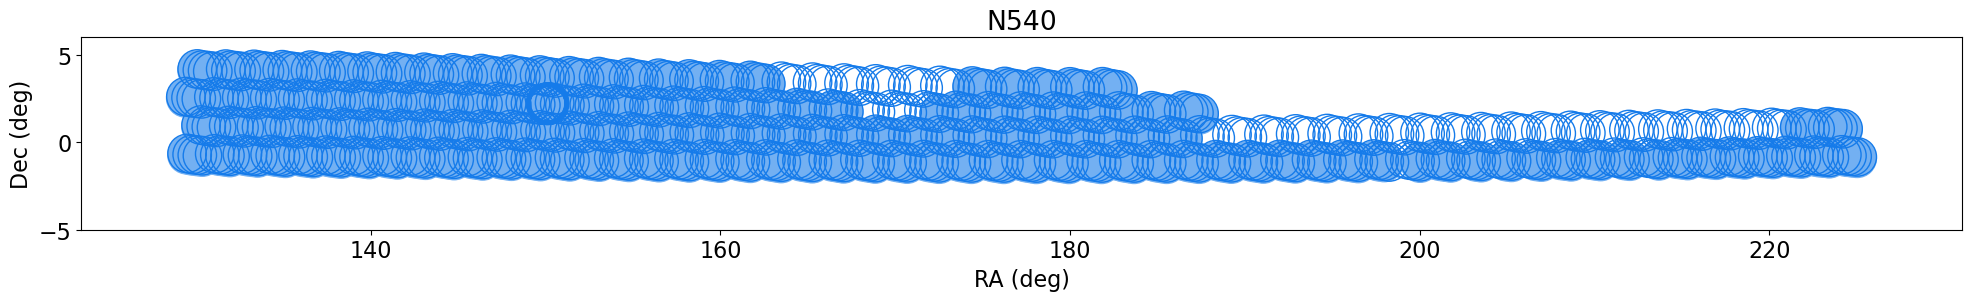

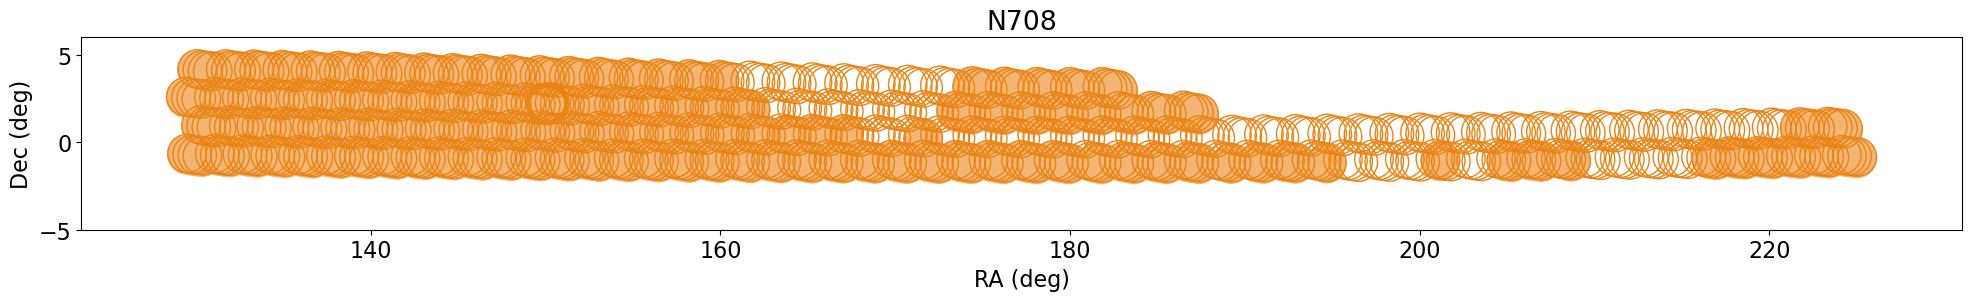

In [154]:
teff_d = {'N540':300, 'N708':200}
colors_d = {'N540':"#157BEA", "N708":"#EA8415"}


season = 'spring'
halpha_pointings, oiii_pointings =  getattr(our_pointings, f'load_{season}fields')()
pointings_d = {'N540':oiii_pointings,'N708':halpha_pointings} 

for ofilter in ['N540', 'N708']:
    teff_min = teff_d[ofilter]
    pointings = pointings_d[ofilter]
    completed = coo_d[f'{season[0]}{ofilter}'].identify_completed_pointings ( teff_min )


    fig, ax = plt.subplots(1,1, figsize=(20,5))
    ax.set_aspect('equal')

    ccolor = ec.ColorBase(colors_d[ofilter])
    for name,row in completed.iterrows ():
        circ = patches.Circle ( (wrap(row['racenter']), row['deccenter']),  radius=1.1, color=ccolor.modulate(0.2).base,)
        ax.add_patch(circ)
    for name,row in pointings.iterrows ():
        circ = patches.Circle ( (wrap(row['RA']), row['dec']),  radius=1.1, 
                               facecolor='None', edgecolor=ccolor.modulate(-0.).base,)
        ax.add_patch(circ)
    #ax.scatter ( wrap(completed['racenter']), completed['deccenter'], s=msize**2, color=ccolor.modulate(0.2).base, label='executed')
    ax.scatter ( wrap(pointings['RA']), pointings['dec'], color='w', zorder=-10)
    #            facecolor='None', edgecolor=ccolor.modulate(-0.).base, s=msize**2, lw=1, linewidth=0.5, label='planned' )

    pointings = pointings_d[ofilter]
    ax.set_title ( ofilter )
    ax.set_ylim(-5.,6.)
    ax.set_xlabel('RA (deg)')
    ax.set_ylabel('Dec (deg)')     
    plt.tight_layout ()  
    plt.savefig(f'/Users/kadofong/Downloads/{season}_{ofilter}.png')


In [78]:
plt.rcParams['lines.markersize']  =3

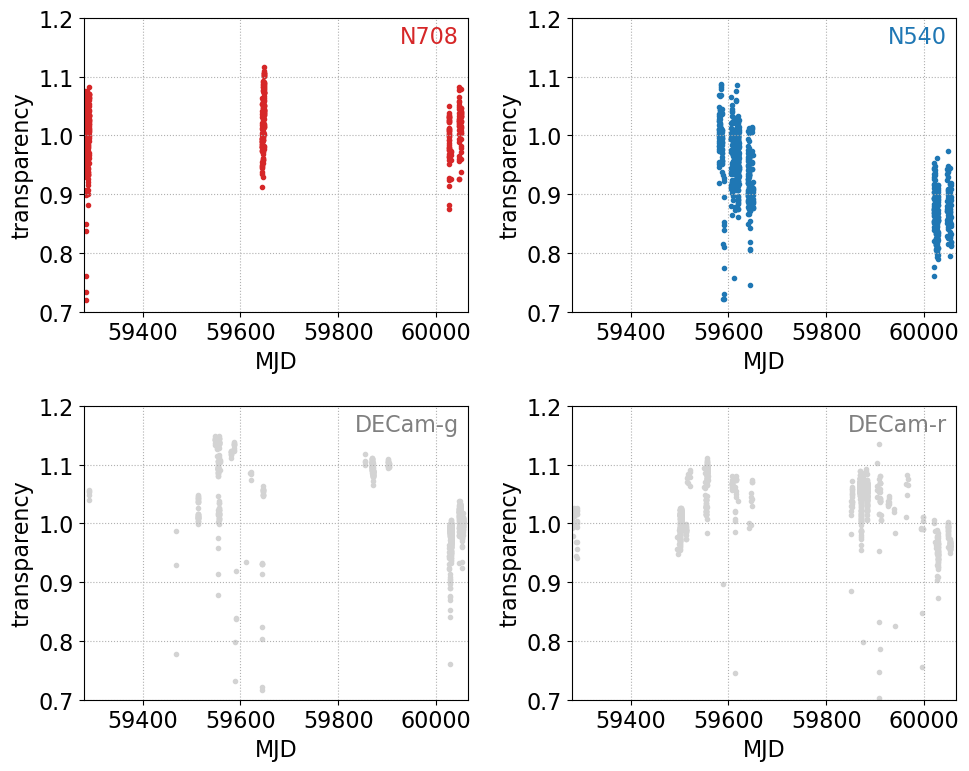

In [79]:
fig, axarr = plt.subplots(2,2,figsize=(10,8))
axarr = axarr.flatten()
axarr[1].scatter ( coo_o.merian_sidecar['mjd_obs'], coo_o.merian_sidecar['transparency'], color='tab:blue')
#axarr[0].scatter ( coo_o.merian_sidecar['mjd_obs'], coo_o.merian_sidecar['transparency'], color='tab:blue', s=1)

axarr[0].scatter ( coo_h.merian_sidecar['mjd_obs'], coo_h.merian_sidecar['transparency'], color='tab:red')

gmask = coo_o.sidecar['band'] == 'g'
axarr[2].scatter ( coo_o.sidecar.loc[gmask,'mjd_obs'], 
             coo_o.sidecar.loc[gmask,'transparency'],
             zorder=-10,
            color='lightgrey'
        )
gmask = coo_o.sidecar['band'] == 'r'
axarr[3].scatter ( coo_o.sidecar.loc[gmask,'mjd_obs'], 
             coo_o.sidecar.loc[gmask,'transparency'],
             zorder=-10,
            color='lightgrey'
        )

for ax in axarr:
    ax.set_ylim(0.7,1.2)
    ax.set_xlabel('MJD')
    ax.set_ylabel('transparency')
    ax.set_xlim(xmin,xmax)
    ax.grid ( ls=':')
    
ek.text ( 0.975, 0.975, 'N708', color='tab:red', ax=axarr[0])
ek.text ( 0.975, 0.975, 'N540', color='tab:blue', ax=axarr[1])
ek.text ( 0.975, 0.975, 'DECam-g', color='grey', ax=axarr[2])
ek.text ( 0.975, 0.975, 'DECam-r', color='grey', ax=axarr[3])

plt.tight_layout ()
plt.savefig('/Users/kadofong/Downloads/transparency_vs_time.png')

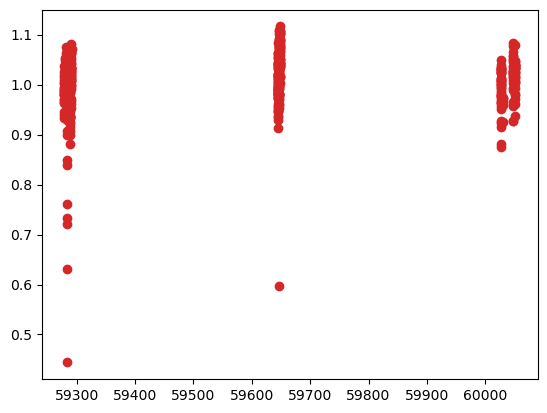